<a href="https://colab.research.google.com/github/Pokulord/Chislo_Methods/blob/master/RGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

РГР по Численным методам
Выполнил студент группы РИ-321055 Черников Святослав Сергеевич

Номер в журнале : 19

## 1. Численное решение нелинейных уравнений. Вариант 4

Написать функцию для решения нелинейного уравнения следующими методами:
a.
Ньютона
b.
бисекций
c.
секущих

2)
Построить график функции f(x) для своего варианта и приблизительно определить по графику корни уравнения.

3)
Решить уравнение f(x)= 0 с точностью ε = 10^(- 4) каждым из изученных выше методов.

4)
Сравнить количество итераций, требующееся для каждого метода, сделать выводы.

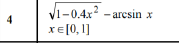

Метод Ньютона: корень = 0.7671659, количество итераций = 4
----------------------------------------
Метод бисекций: корень = 0.7671875, количество итераций = 9
----------------------------------------
Метод секущих: корень = 0.7671627, количество итераций = 5
----------------------------------------


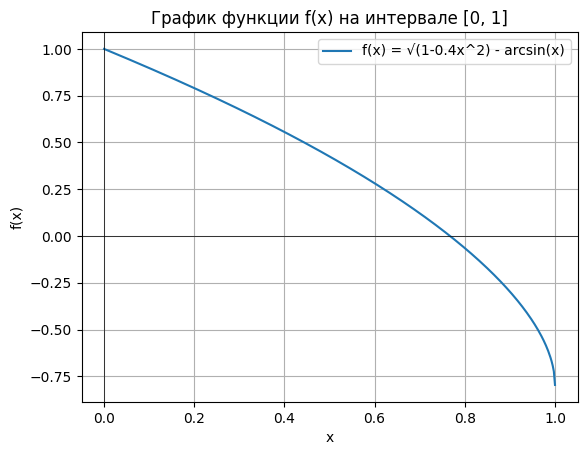

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu

class RGR_METHODS:
    def __init__(self):
        # Начальные приближения для методов
        self.x0_newton = 0.5  # начальное приближение для Ньютона
        self.x0_secant = 0.5  # первое начальное приближение для секущих
        self.x1_secant = 0.6  # второе начальное приближение для секущих
        self.a_bisection = 0.1  # начало интервала для бисекции
        self.b_bisection = 0.9  # конец интервала для бисекции
        self.print_results()
        self.draw_graph()

    # Определим функцию f(x) и её производную для метода Ньютона
    def f(self,x):
        return np.sqrt(1 - 0.4 * x**2) - np.arcsin(x)

    # Производная функции f(x) для метода Ньютона
    def df(self,x):
        return (-0.4 * x / np.sqrt(1 - 0.4 * x**2)) - (1 / np.sqrt(1 - x**2))

    # Метод Ньютона
    def newton_method(self,f, df, x0, epsilon=1e-4, max_iter=1000):
        x = x0
        for i in range(max_iter):
            fx = f(x)
            dfx = df(x)
            if abs(fx) < epsilon:
                return x, i+1
            x = x - fx / dfx
        return x, max_iter

    # Метод бисекций
    def bisection_method(self,f, a, b, epsilon=1e-4, max_iter=1000):
        if f(a) * f(b) >= 0:
            raise ValueError("Функция должна иметь разные знаки на концах отрезка")

        for i in range(max_iter):
            c = (a + b) / 2
            fc = f(c)
            if abs(fc) < epsilon or (b - a) / 2 < epsilon:
                return c, i+1
            if f(a) * fc < 0:
                b = c
            else:
                a = c
        return (a + b) / 2, max_iter

    # Метод секущих
    def secant_method(self,f, x0, x1, epsilon=1e-4, max_iter=1000):
        for i in range(max_iter):
            fx0 = f(x0)
            fx1 = f(x1)
            if abs(fx1) < epsilon:
                return x1, i+1
            x_temp = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
            x0, x1 = x1, x_temp
        return x1, max_iter

    # 4. Построение графика функции f(x) в интервале [0, 1]
    def draw_graph(self):
        x_vals = np.linspace(0, 1, 400)
        y_vals = self.f(x_vals)

        plt.plot(x_vals, y_vals, label="f(x) = √(1-0.4x^2) - arcsin(x)")
        plt.axhline(0, color='black',linewidth=0.5)
        plt.axvline(0, color='black',linewidth=0.5)
        plt.grid(True)
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("График функции f(x) на интервале [0, 1]")
        plt.show()





    def print_results(self):
    # Решение методом Ньютона
        root_newton, iter_newton = self.newton_method(self.f, self.df, self.x0_newton)
        print(f"Метод Ньютона: корень = {round(root_newton,7)}, количество итераций = {iter_newton}")
        print("-" * 40)
        # Решение методом бисекций
        root_bisection, iter_bisection = self.bisection_method(self.f, self.a_bisection, self.b_bisection)
        print(f"Метод бисекций: корень = {round(root_bisection,7)}, количество итераций = {iter_bisection}")
        print("-" * 40)
        # Решение методом секущих
        root_secant, iter_secant = self.secant_method(self.f, self.x0_secant, self.x1_secant)
        print(f"Метод секущих: корень = {round(root_secant,7)}, количество итераций = {iter_secant}")
        print("-" * 40)


if __name__ == "__main__":
    obj = RGR_METHODS()



# Вывод
 В результате проделанных действий можно сделать вывод о том, что наибольшее количество итераций потребовалось для метода бисекций, а наименьшее их количество было достигнуто при вычислении методом  Ньютона

 При определении корня "на глаз" было получено значение 0.77

# 2 Численное решение систем линейных уравнений. Вариант 9

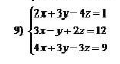

1.Реализовать алгоритм решения систем ленейных уравнений методом Гаусса, используя LU разложение матрицы A (стр. 75 , см. файл с методичкой С.В.Лемешевского)

In [1]:

import numpy as np


class Task2:
    def __init__(self) -> None:
        # Коэффы матриц
        self.A = np.array(
            [[2, 3, -4],
            [3, -1, 2],
            [4, 3, -3]])
        self.b = np.array([1, 12, 9])

        x = self.Gauss_method(self.A, self.b)

        print("Решение системы уравнений методом Гаусса:", x)


    # Подготовка матрицы для вычислений
    def prepare_matrix(self):
        self.A = self.A.astype(np.float64)
        self.b = self.b.astype(np.float64)
        self.prepared_matrix = np.concatenate((self.A, self.b.reshape(-1, 1)), axis=1)

    # Метод Гаусса
    def Gauss_method(self, A, b):

        n = len(A)
        self.prepare_matrix()

        for i in range(n):
            pivot = self.prepared_matrix[i, i]
            if pivot == 0:
                raise ValueError("Система уравнений не имеет единственного решения")
            self.prepared_matrix[i] /= pivot
            for j in range(i + 1, n):
                factor = self.prepared_matrix[j, i]
                self.prepared_matrix[j] -= factor * self.prepared_matrix[i]

        for i in range(n - 1, -1, -1):
            for j in range(i - 1, -1, -1):
                factor = self.prepared_matrix[j, i]
                self.prepared_matrix[j] -= factor * self.prepared_matrix[i]

        x = self.prepared_matrix[:, n]

        return x






if __name__ == "__main__":
    obj = Task2()


Решение системы уравнений методом Гаусса: [3. 1. 2.]


2. Реализовать решение систем линейных уравнений методом Якоби

In [3]:
import numpy as np
import pandas as pd


class Task2:
    # Коэффициенты системы уравнений
    def __init__(self) -> None:
        self.A = np.array([[2, 3, -4],
                    [3, -1, 2],
                    [4, 3, -3]], dtype=float)
        self.b = np.array([1, 12, 9], dtype=float)

        # Начальное приближение для x, y, z
        self.x = np.zeros_like(self.b)

        # Точность вычислений
        self.accur = 1e-10
        self.max_iter_steps = 100

        # Список для хранения значений на каждой итерации
        self.results = []

        self.Jacobi_method()
    # Метод Якоби
    def Jacobi_method(self):

        for iter_step in range(self.max_iter_steps):
            self.x_new = np.zeros_like(self.x)

            # Обновляем значения для каждой переменной
            for i in range(self.A.shape[0]):
                s = sum(self.A[i][j] * self.x[j] for j in range(self.A.shape[1]) if j != i)
                self.x_new[i] = (self.b[i] - s) / self.A[i][i]

            # Добавляем результаты текущей итерации в список
            self.results.append([self.x_new[0], self.x_new[1], self.x_new[2]])

            # Проверка на сходимость
            if np.linalg.norm(self.x_new - self.x, ord=np.inf) < self.accur:
                break

            self.x = self.x_new

        # Отключение научной нотации
        pd.set_option('display.float_format', lambda x: '%.6f' % x)

        # Создаем DataFrame для отображения результатов
        df_results = pd.DataFrame(self.results, columns=['x', 'y', 'z'])

        # Вывод таблицы с результатами
        print("Результаты вычислений в формате DataFrame (для более наглядного представления):")
        print(df_results)

        # Вывод окончательного решения
        print(f"\nОкончательное решение после {iter_step+1} итераций:")
        print(df_results.iloc[-1])



if __name__ == "__main__":
    obj = Task2()

Результаты вычислений в формате DataFrame (для более наглядного представления):
                     x                     y                     z
0             0.500000            -12.000000             -3.000000
1            12.500000            -16.500000            -14.333333
2            -3.416667             -3.166667             -2.833333
3            -0.416667            -27.916667            -10.722222
4            20.930556            -34.694444            -31.472222
..                 ...                   ...                   ...
95  40695899732.762817  -855118192301.798706  -614413580492.891479
96  53850127467.415039 -1106739461799.494629  -800856992661.114868
97  58395207377.512207 -1440163602931.984619 -1034939291845.941284
98  90366820706.594482 -1894692961571.345947 -1362303326431.635010
99 117432789494.249023 -2453506190755.486328 -1774203867298.886719

[100 rows x 3 columns]

Окончательное решение после 100 итераций:
x     117432789494.249023
y   -2453506190755.4863

3. Реализовать алгоритм решения систем линейных уравнений методом Зейделя

In [15]:

import numpy as np

class Task2:
    def __init__(self) -> None:
        A = np.array([
        [2, 3, -4],
        [3, -1, 2],
        [4, 3, -3]], dtype=np.float64)
        b = np.array([1, 12, 9], dtype=np.float64)

        solution = self.seidel_method(A, b)
        for res in range(len(solution)):
          print(f" x{res+1} = {solution[res]}")
    #Метод Зейделя
    def seidel_method(self,A, b, max_iter=100, tol=1e-6):

        n = len(b)
        x = np.zeros_like(b, dtype=np.float64)

        for i in range(max_iter):
            x_new = np.copy(x)

            for j in range(n):
                sum_ax = 0
                for k in range(j):
                    sum_ax += A[j, k] * x_new[k]
                for k in range(j + 1, n):
                    sum_ax += A[j, k] * x[k]
                x_new[j] = (b[j] - sum_ax) / A[j, j]

            max_diff = 0
            for k in range(n):
                max_diff = max(max_diff, abs(x_new[k] - x[k]))
            if max_diff < tol:
                return x_new

            x = np.copy(x_new)

        return x_new



if __name__ == "__main__":
    obj = Task2()

 x1 = -1.2535713489471127e+73
 x2 = -6.928124407505485e+73
 x3 = -8.599552872768302e+73


Проверить решение с помощью solve

In [16]:
#Проверка решения
import numpy as np

A = np.array(
    [[2, 3, -4],
    [3, -1, 2],
    [4, 3, -3]])
b = np.array([1, 12, 9])

x = np.linalg.solve(A, b)

print(f"Решение системы уравнений: {x}")
print("Корни:")
for i, root in enumerate(x):
  print(f"x{i+1} = {root}")

Решение системы уравнений: [3. 1. 2.]
Корни:
x1 = 3.0
x2 = 1.0
x3 = 2.0


# Вывод
Наиболее точно показал себя метод Гаусса, у остальных же методов точность значительно меньше.

# Численное решение систем нелинейных уравнений. Вариант 4

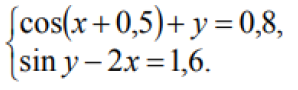

1.Построить график функций и найти графически приблизительное решение системы уравнений

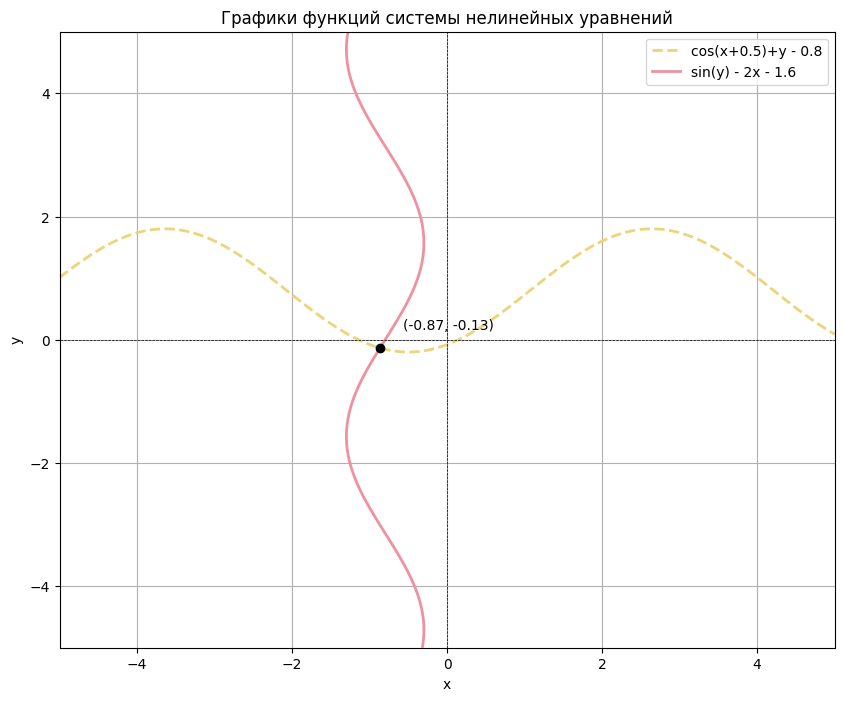

Приблизительное решение: x = -0.867, y = -0.134


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve



class Task3:
    def __init__(self) -> None:
        # Создаём сетку значений для графика
        self.x_values = np.linspace(-5, 5, 400)
        self.y_values = np.linspace(-5, 5, 400)
        self.X, self.Y = np.meshgrid(self.x_values, self.y_values)

        # Значения функций сетки
        self.Z1 = self.f1(self.X, self.Y)
        self.Z2 = self.f2(self.X, self.Y)

        self.draw_graph()
    # Определяем функции на основе системы уравнений
    def f1(self, x, y):
        return np.cos(x+0.5) + y - 0.8

    def f2(self, x, y):
        return np.sin(y) - 2*x - 1.6





    def draw_graph(self):
        plt.figure(figsize=(10, 8))
        contour1 = plt.contour(self.X,self.Y,self.Z1, levels=[0], colors='#ecd47b', linewidths=2, linestyles='dashed')
        contour2 = plt.contour(self.X, self.Y, self.Z2, levels=[0], colors='#ef919f', linewidths=2, linestyles='solid')
        plt.title('Графики функций системы нелинейных уравнений')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axhline(0, color='black', linewidth=0.5, ls='--')
        plt.axvline(0, color='black', linewidth=0.5, ls='--')
        plt.grid()

        line1 = plt.Line2D([0], [0], color='#ecd47b', linestyle='dashed', lw=2)
        line2 = plt.Line2D([0], [0], color='#ef919f', linestyle='solid', lw=2)
        plt.legend([line1, line2], ['cos(x+0.5)+y - 0.8', 'sin(y) - 2x - 1.6'])

        plt.xlim(-5, 5)
        plt.ylim(-5, 5)

        #! Поиск графического решения
        # Начальные приближения
        initial_guesses = [(-1, 0), (0, 1), (1, 0)]

        # Находим решения с помощью метода fsolve
        solutions = []
        for guess in initial_guesses:
            sol = fsolve(lambda vars: [self.f1(vars[0], vars[1]), self.f2(vars[0], vars[1])], guess)
            # Проверка уникальности решений
            if not any(np.allclose(sol, existing_sol) for existing_sol in solutions):
                solutions.append(sol)

        # Отображение найденных решений на графике
        for sol in solutions:
            plt.plot(sol[0], sol[1], 'ko')  # Отметим решения черными точками
            plt.text(sol[0] + 0.3, sol[1] + 0.3, f'({sol[0]:.2f}, {sol[1]:.2f})', fontsize=10, ha='left', color='black')

        plt.show()

        # Вывод найденных решений
        for idx, sol in enumerate(solutions):
            print(f'Приблизительное решение: x = {round(sol[0], 3)}, y = {round(sol[1], 3)}')




if __name__ == "__main__":
    obj = Task3()

2. Найти решение системы методом прямых итераций (20 итераций)

In [24]:
import numpy as np
import pandas as pd


class Task3:

    def __init__(self) -> None:
        # Начальные приближения
        x0, y0 = 0, 0
        df = self.iterative_method(x0, y0)
            # Отображение DataFrame
        print(df)

    def iterative_method(self, x0, y0, iterations=20):
        results = {'Итерация': [], 'x': [], 'y': []}
        x, y = x0, y0
        for i in range(iterations):
            y_new = 0.8 - np.cos(x + 0.5)
            x_new = (np.sin(y) - 1.6) / 2
            x, y = x_new, y_new
            results['Итерация'].append(i+1)
            results['x'].append(x)
            results['y'].append(y)

        # Создаем DataFrame из результатов
        df = pd.DataFrame(results)
        return df





if __name__ == "__main__":
    obj = Task3()

    Итерация         x         y
0          1 -0.800000 -0.077583
1          2 -0.838752 -0.155336
2          3 -0.877356 -0.143170
3          4 -0.871341 -0.129642
4          5 -0.864640 -0.131842
5          6 -0.865730 -0.134252
6          7 -0.866925 -0.133863
7          8 -0.866732 -0.133435
8          9 -0.866520 -0.133504
9         10 -0.866554 -0.133580
10        11 -0.866592 -0.133568
11        12 -0.866586 -0.133554
12        13 -0.866579 -0.133557
13        14 -0.866580 -0.133559
14        15 -0.866581 -0.133559
15        16 -0.866581 -0.133558
16        17 -0.866581 -0.133558
17        18 -0.866581 -0.133558
18        19 -0.866581 -0.133558
19        20 -0.866581 -0.133558


3. Найти решение системы методом Гаусса-Зейделя (20 итераций)

In [26]:
import numpy as np
import pandas as pd


class Task3:

    def __init__(self) -> None:

    # Начальные приближения
        x0, y0 = 0, 0
        df = self. gauss_seidel_method(x0, y0)

        # Отображение DataFrame
        print(df)

    def gauss_seidel_method(self, x0, y0, iterations=20):
        results = {'Итерация': [], 'x': [], 'y': []}
        x, y = x0, y0
        for i in range(iterations):
            # Обновляем y с использованием текущего значения x
            y = 0.8 - np.cos(x + 0.5)

            # Обновляем x с использованием нового значения y
            x = (np.sin(y) - 1.6) / 2

            # Сохраняем результаты текущей итерации
            results['Итерация'].append(i+1)
            results['x'].append(x)
            results['y'].append(y)

        # Создаем DataFrame из результатов
        df = pd.DataFrame(results)
        return df

if __name__ == "__main__":
    obj = Task3()

    Итерация         x         y
0          1 -0.838752 -0.077583
1          2 -0.871341 -0.143170
2          3 -0.865730 -0.131842
3          4 -0.866732 -0.133863
4          5 -0.866554 -0.133504
5          6 -0.866586 -0.133568
6          7 -0.866580 -0.133557
7          8 -0.866581 -0.133559
8          9 -0.866581 -0.133558
9         10 -0.866581 -0.133558
10        11 -0.866581 -0.133558
11        12 -0.866581 -0.133558
12        13 -0.866581 -0.133558
13        14 -0.866581 -0.133558
14        15 -0.866581 -0.133558
15        16 -0.866581 -0.133558
16        17 -0.866581 -0.133558
17        18 -0.866581 -0.133558
18        19 -0.866581 -0.133558
19        20 -0.866581 -0.133558


4. Найти решение системы методом Ньютона (20 итераций)

In [27]:
import numpy as np
import pandas as pd
import math



class Task3:

    def __init__(self) -> None:
        self.newton_method()

        # Начальные приближения
        x0, y0 = 0, 0
        df = self.newton_method(x0, y0)

        # Отображение DataFrame
        print(df)
    # Система нелинейных уравнений
    def F(self, x, y):
        return np.array([math.cos(x + 0.5) + y - 0.8,
                        math.sin(y) - 2*x - 1.6])

    # Якобиан системы
    def J(self, x, y):
        return np.array([[-math.sin(x + 0.5), 1],
                        [-2, math.cos(y)]])

    # Метод Ньютона
    def newton_method(self, x0 = 0, y0 = 0 , iterations=20):
        results = {'Итерация': [], 'x': [], 'y': []}
        x, y = x0, y0
        for i in range(iterations):
            # Вычисляем значения функции и якобиана в текущей точке
            F_val = self.F(x, y)
            J_val = self.J(x, y)

            # Решаем систему линейных уравнений для обновления переменных
            delta = np.linalg.solve(J_val, F_val)

            # Обновляем x и y
            x, y = np.array([x, y]) - delta

            # Сохраняем результаты итерации
            results['Итерация'].append(i+1)
            results['x'].append(x)
            results['y'].append(y)

        # Создаем DataFrame из результатов
        df = pd.DataFrame(results)
        return df



if __name__ == "__main__":

    obj = Task3()


    Итерация         x         y
0          1 -1.103256 -0.606512
1          2 -0.894209 -0.142091
2          3 -0.866730 -0.133855
3          4 -0.866581 -0.133558
4          5 -0.866581 -0.133558
5          6 -0.866581 -0.133558
6          7 -0.866581 -0.133558
7          8 -0.866581 -0.133558
8          9 -0.866581 -0.133558
9         10 -0.866581 -0.133558
10        11 -0.866581 -0.133558
11        12 -0.866581 -0.133558
12        13 -0.866581 -0.133558
13        14 -0.866581 -0.133558
14        15 -0.866581 -0.133558
15        16 -0.866581 -0.133558
16        17 -0.866581 -0.133558
17        18 -0.866581 -0.133558
18        19 -0.866581 -0.133558
19        20 -0.866581 -0.133558


# Вывод

### Выводы по применению методов для решения системы нелинейных уравнений:

1. **Метод прямых итераций:**

   
   - **Результат**: В нашем случае метод прямых итераций с 20 шагами дал результаты, которые постепенно приближались к решению, но может потребоваться больше итераций для точного результата.

2. **Метод Гаусса-Зейделя:**

   
   - **Результат**: Система постепенно сходилась к решению, хотя для более точных результатов требуется больше итераций. Схож с методом прямых итераций, но немного более эффективен.

3. **Метод Ньютона:**

  
   - **Результат**: В нашем случае метод Ньютона показал быстрый прогресс к точному решению за несколько итераций. Однако, если начальные условия выбраны неправильно, метод может не сойтись.

### Общие выводы:

- **Метод прямых итераций** и **метод Гаусса-Зейделя** просты в реализации, но часто требуют хороших начальных приближений и большого количества итераций для достижения приемлемого результата.
- **Метод Ньютона** — наиболее мощный из примененных методов. Он дает быстрое решение благодаря квадратичной сходимости, но требует вычисления якобиана и может не сходиться при плохом выборе начальных условий.
  
Для данной системы нелинейных уравнений метод Ньютона оказался наиболее эффективным, обеспечивая быстрое приближение к решению. Методы итераций можно применять как предварительные шаги для нахождения хороших начальных приближений для метода Ньютона.